<a href="https://colab.research.google.com/github/henriquecelestino/PowerBI/blob/master/aula2_maratona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='Blue'>Maratona Cientista de Dados na Prática</font>

### <font color='GREY'> SAE - Sistema de Aprovação de Empréstimos </font>  

![](https://i.gifer.com/MKsN.gif)




# <font color='Black'> **Aula 2 - Construíndo Máquinas Preditivas** </font>

![](https://play.vidyard.com/17BCs3HpfP36GhwmAgaKuC.jpg)

#### Vamos refazer algumas etapas da **AULA 1** para começar a construção das Máquinas Preditivas.


In [2]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")

#Importação dos Dados
clientes = pd.read_csv('/content/clientes.csv')

#Substituindo caracteres por números
clientes['sexo']= clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil']= clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

# Eliminando valores Nulos
clientes = clientes.dropna()

# Separando variáveis Explicativas e Variável TARGET
X = clientes[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = clientes.aprovacao_emprestimo
X.shape, y.shape

# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [4]:
x_train

,sexo,estado_civil,renda,emprestimo,historico_credito
172,0.0,1.0,3522,81.0,1.0
4,0.0,0.0,6000,141.0,1.0
566,0.0,0.0,3333,70.0,1.0
74,0.0,1.0,5266,187.0,1.0
417,0.0,1.0,1600,239.0,1.0
...,...,...,...,...,...
269,1.0,0.0,2876,90.0,1.0
85,0.0,0.0,2366,136.0,1.0
33,0.0,1.0,3500,114.0,1.0
251,1.0,0.0,3427,138.0,1.0


# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

![](https://i.pinimg.com/originals/99/aa/fe/99aafeb638771b8cacf8a4670b34ea70.gif)

In [5]:
#Importando Pacotes para Construção das Máquinas Preditivas com Machine Learning

## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier 

In [6]:
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier() 
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#5° Avaliando a Máquina Preditiva

In [7]:
#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score

In [8]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina)

1.0

In [9]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina)

0.75

### 2° Versão da Máquina Preditiva: Batendo o Baseline

#### Tunando (calibrando) **Hiperparâmetros** do Algoritmo

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Vamos utilizar um hiperparâmetro do algoritimo RANDOM FOREST de nome "**max_depth**", cujo objetivo é exatamente combater problemas de "***Overfiting***".

![](https://hackernoon.com/hn-images/1*SBUK2QEfCP-zvJmKm14wGQ.png)

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif)

![](https://cdn-images-1.medium.com/max/1600/1*vuZxFMi5fODz2OEcpG-S1g.png)

### Usando o Hiperparâmetro "**max_depth**" para diminuir "overfiting"

In [12]:
# Criando a Máquina Preditiva com o Random Forest 
maquina = RandomForestClassifier(max_depth=4, random_state = 7) 
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [13]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina_treino)

0.8229166666666666

In [14]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

0.78125

![](https://i.pinimg.com/originals/33/32/cb/3332cba8c30ea6266cb86695bb59871e.gif)

### Verificando as Variáveis mais importantes

In [15]:
#Importancia das Variáveis
maquina.feature_importances_

array([0.0226187 , 0.03447823, 0.17332143, 0.17593175, 0.59364989])

[0.0226187  0.03447823 0.17332143 0.17593175 0.59364989]


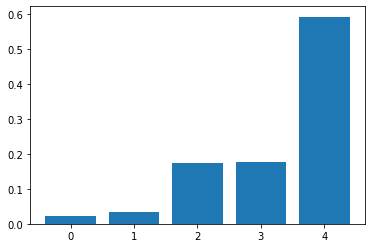

In [ ]:
#Importancia das Variáveis com Gráfico
print(maquina.feature_importances_)
# plot
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

In [ ]:
#['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']

## Podemos salvar nossa Máquina Preditiva para criarmos o Sistema na WEB


In [17]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva.pkl", mode = "wb") 
pickle.dump(maquina, pickle_out) 
pickle_out.close()

![](https://nanonets.com/blog/content/images/2020/08/Comp-1_1-1.gif)

# <font color='Blue'>6° Deploy - Implementando a Maquina Preditiva na WEB</font>
![](https://buhgalteru.kz/wp-content/uploads/2020/09/robot.gif)
![](https://techcrunch.com/wp-content/uploads/2020/01/spacex-starlink-launch-jan-20.gif?w=730&crop=1)

# Fim